In [1]:
# Homework Repo Setup

# 1. ENTER your GitHub username (the one that owns your fork)
github_username ="Cipher212"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Ensure we start from /content ---
# This is crucial to prevent nested cloning/directory changes if notebook was previously run
initial_cwd = os.getcwd()
if initial_cwd != "/content":
    os.chdir("/content")
    print(f"🌍 Changed to /content from {initial_cwd}")
else:
    print(f"🌍 Already in /content.")


# --- Handle repo cloning and initial directory change ---
if os.path.exists(repo_name) and os.path.isdir(repo_name):
    # If repo exists, simply change into it from /content
    os.chdir(repo_name)
    print(f"✅ Repo '{repo_name}' already exists. Changed directory to: {os.getcwd()}")
else:
    # If repo does not exist, clone it
    print(f"📥 Cloning repo from {repo_url}...")
    os.system(f"git clone {repo_url}")
    # After cloning, change into the newly created repo directory (which is now in /content)
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found after cloning. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# --- Set Today's Directory ---
today_dir = "Assignments/HW1"
if os.path.exists(today_dir) and os.path.isdir(today_dir):
    os.chdir(today_dir)
    print(f"📂 Changed directory to: {os.getcwd()}")
else:
    print(f"❌ ERROR: Today's directory '{today_dir}' not found relative to {os.getcwd()}.")
    print(f"💡 Please ensure '{today_dir}' exists in your cloned repository.")

🌍 Already in /content.
📥 Cloning repo from https://github.com/Cipher212/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/Cipher212/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

**Question 2.** Specify the outcome variable

**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.


# **TEXT ANSWERS**

# **Question 1**

The goal of this experiment is to determine if aging the IPA beer in a statistically significant difference in the bitterness (IBU) and to visualise how the t\hree weeks differ from each other in terms of IBU.

# **Question 2**

The outcome variable would be the IBU Bitterness.

# **Question 3**

The Independent Variable would be the Week. (3,4,5). Lurking variables could be factors such as the temperatures of each aging tank, whether each aging tank is physically identical, the calibration of the equipment used to take the actual reading of the IBU for each batch.

# **Question 4**
CRD is ideal for this experiment as its very simple. We have only one independent variable (Weeks) contorlling the dependent variable (IBU).
We are dealing with homogenous data, all IPA comes from the same batch. CRD suits the ANOVA and Tukey HSD that I plan to do as well.

Also, assuming that the lurking variables discussed in question 3 are not a factor, then this data is a single block, which also means its fine to design CRD for it.

#**Question 5**

Null: No significant statistical difference in bitterness for all 3 IPA batches

H0: B3=B4=B5

Alternative: At least one B(i) is different

#**Question 6**


     Weeks    IBU
0  3 Weeks  39.41
1  3 Weeks  53.18
2  3 Weeks  35.31
         count    mean       std    min      25%     50%      75%    max
Weeks                                                                   
3 Weeks   10.0  49.216  8.300656  35.31  42.6600  50.785  55.8675  59.62
4 Weeks   10.0  62.751  8.250384  47.82  56.0875  65.780  68.8950  71.70
5 Weeks   10.0  69.725  5.631258  60.09  66.9300  70.950  73.1950  78.03


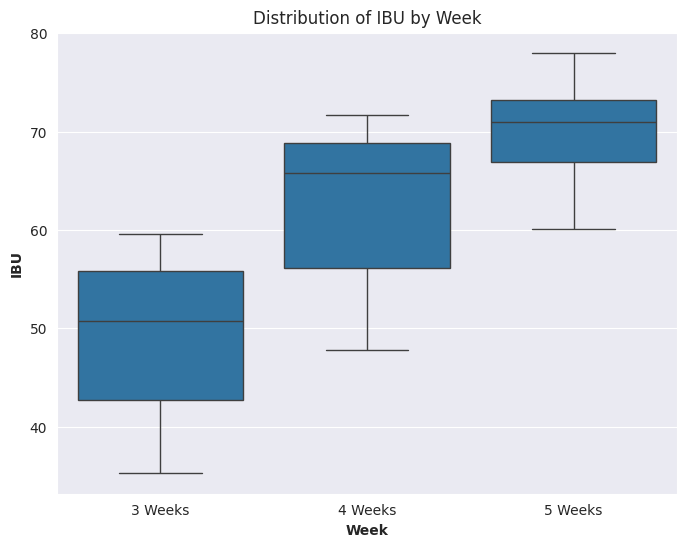

In [2]:
# Exploratory Analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols



#Load the dataset
df = pd.read_excel('IPA.xlsx')
print(df.head(3))

# Basic stats
summary_stats = df.groupby('Weeks')['IBU'].describe()
print(summary_stats)

#boxplot

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weeks', y='IBU', data=df, order=['3 Weeks', '4 Weeks', '5 Weeks'])
plt.title('Distribution of IBU by Week')
plt.ylabel('IBU', fontweight='bold')
plt.xlabel('Week',fontweight='bold')
plt.show()


# **Question 7**

In [3]:
model = ols('IBU ~ C(Weeks)', data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2) #using type 2 sum o f squares

print(anova_table)



              sum_sq    df          F    PR(>F)
C(Weeks)  2174.83994   2.0  19.339842  0.000006
Residual  1518.12718  27.0        NaN       NaN


**Conclusion:** F-Value of 19 and p-value < 0.05, shows that there is a statistically significant change in bitterness for increase in week. Null hypothesis is rejected.

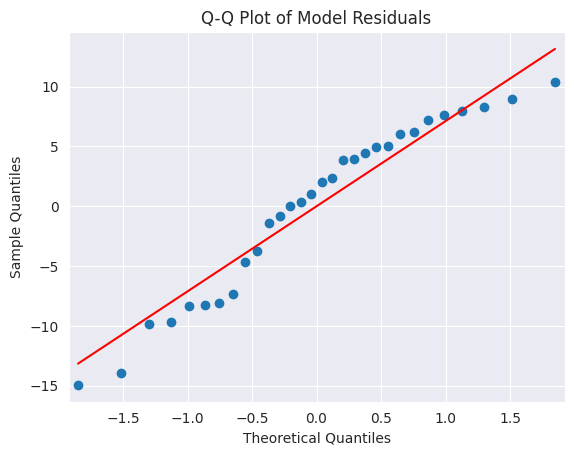

In [4]:
# Visualisation

sm.qqplot(model.resid, line='s')
plt.title("Q-Q Plot of Model Residuals")
plt.show()


**Conclusion**: Considering the fact that we only have 30 points, and besides tails there is mostly linearity in qqplot, the visualisation also supports the ANOVA test results p-value. We can safely reject null hypothesis and assume normality. 30 data points is also minimum for CLT to kick in.